## Q2.베이직 구독 사용자가 프리미엄 구독으로 전환할 가능성은 얼마나 되는가?
> "베이직 사용자는 특정 조건(예: 높은 `문의횟수` 또는 긴 `구독기간`)을 만족할 때 프리미엄으로 전환할 가능성이 높다."

#### 2-1 데이터 전처리

In [ ]:
# import pandas as pd

# df = pd.read_csv('C:\\workspace\\WASSUP4\\data\\mini.csv', sep=',')

# basic_users = df[df['subscription_type'] == 'Basic']

# basic_users.head()

# print(df.columns)

# basic_users[['customer_inquiry_history', 'subscription_duration', 'target']].describe()

# import seaborn as sns
# import matplotlib.pyplot as plt

# # 상관관계 히트맵 - 'upgraded' 대신 'target'을 사용
# plt.figure(figsize=(8, 6))
# sns.heatmap(basic_users[['customer_inquiry_history', 'subscription_duration', 'target']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title("Correlation Heatmap for Basic Users")
# plt.show()


In [3]:
# 결측치 없음.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'C:\\workspace\\WASSUP4\\data\\mini.csv'
df = pd.read_csv(file_path, sep=',')

# Basic 사용자의 데이터만 필터링
basic_users = df[df['subscription_type'] == 'Basic']

### 2-2 상관관계 분석

#### 2-2-1 히트맵
> 모든 변수들이 상관계수가 거의 0에 가까워 상관관계가 매우 낮음을 나타냅니다.
예를 들어, customer_inquiry_history와 target 간의 상관계수는 약 -0.0028로, 매우 미약한 음의 상관관계만을 보입니다.
<br>이 결과는 문의 횟수나 구독 기간이 단독으로 프리미엄 전환에 강한 영향을 미치지 않음을 시사합니다. 추가적인 변수나 조합이 더 필요할 수 있습니다.

#### 

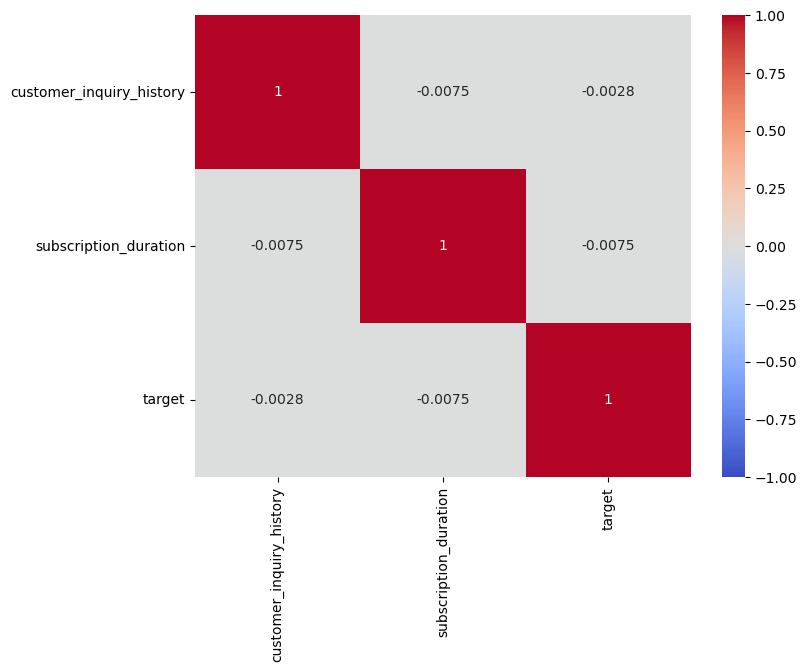

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    basic_users[['customer_inquiry_history', 'subscription_duration', 'target']].corr(), 
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)

plt.xticks(rotation=90)
plt.show()


### 2-3 프리미엄 전환 여부

#### 2-3-1 

Text(0, 0.5, 'Customer Inquiry History')

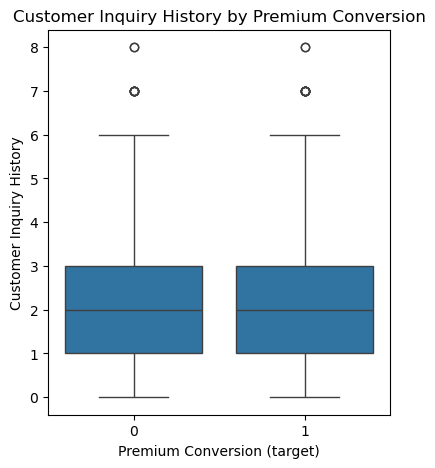

In [38]:
# 전체 박스플롯을 그리기 위한 설정 (하나의 figure로 설정)
plt.figure(figsize=(15, 5))

# 1. customer_inquiry_history와 target의 박스플롯
plt.subplot(1, 3, 1)
sns.boxplot(x='target', y='customer_inquiry_history', data=basic_users)
plt.title('Customer Inquiry History by Premium Conversion')
plt.xlabel('Premium Conversion (target)')
plt.ylabel('Customer Inquiry History')


#### 2-3-2 


Text(0, 0.5, 'Subscription Duration (months)')

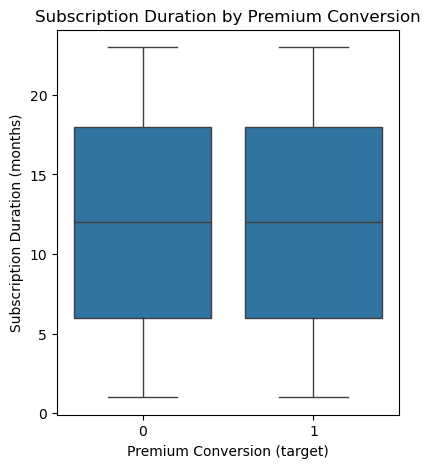

In [40]:
# 2. subscription_duration와 target의 박스플롯
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)

sns.boxplot(x='target', y='subscription_duration', data=basic_users)
plt.title('Subscription Duration by Premium Conversion')
plt.xlabel('Premium Conversion (target)')
plt.ylabel('Subscription Duration (months)')

#### 2-3-3 

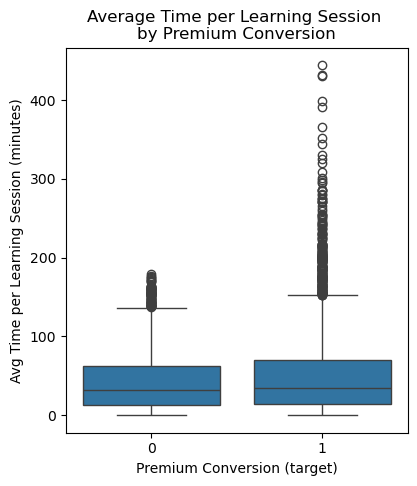

In [47]:
plt.figure(figsize=(15, 5))
# 3. average_time_per_learning_session와 target의 박스플롯
# 필터링된 basic_users 데이터에 average_time_per_learning_session이 있다고 가정합니다.


if 'average_time_per_learning_session' in basic_users.columns:
    plt.subplot(1, 3, 3)
    sns.boxplot(x='target', y='average_time_per_learning_session', data=basic_users)
    plt.title('Average Time per Learning Session \nby Premium Conversion')
    plt.xlabel('Premium Conversion (target)')
    plt.ylabel('Avg Time per Learning Session (minutes)')

#### 2-3-4 문의 횟수와 구독 기간 관계
> 산점도는 두 변수 간의 관계와 함께 target 변수에 따라 색상을 다르게 표시하여 프리미엄 전환 여부에 따른 경향을 시각화
>
> customer_inquiry_history와 subscription_duration 간에 특별한 상관 패턴이 보이지 않습니다. 문의 횟수가 많고 구독 기간이 길어질수록 전환 여부가 증가한다는 명확한 경향이 없습니다.
>
> 대부분의 데이터가 customer_inquiry_history가 04, 그리고 subscription_duration이 020개월 범위에 집중되어 있습니다.
>
> 이 결과는 단독 변수가 아닌 다른 변수와의 조합이 필요할 수 있음을 시사합니다. 즉, 프리미엄 전환은 다수의 복합적인 행동 패턴에 의해 영향을 받을 가능성이 있습니다.


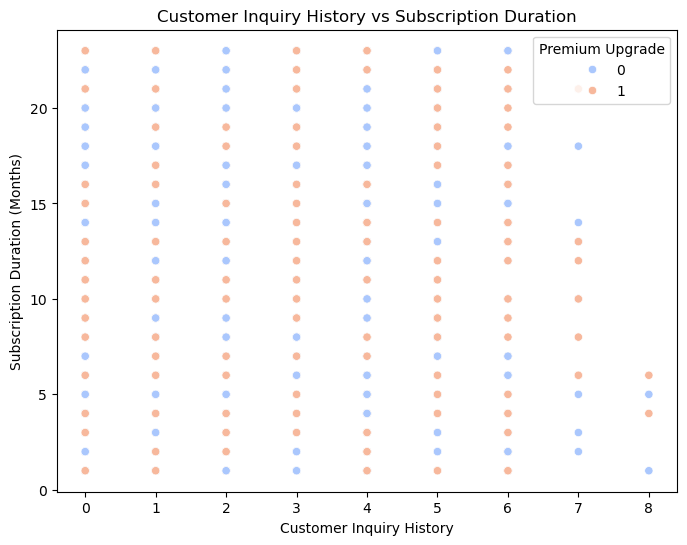

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='customer_inquiry_history', y='subscription_duration', hue='target', data=basic_users, palette='coolwarm')
plt.title("Customer Inquiry History vs Subscription Duration")
plt.xlabel("Customer Inquiry History")
plt.ylabel("Subscription Duration (Months)")
plt.legend(title="Premium Upgrade")
plt.show()


## 2-4 결과 분석
> 프리미엄 전환 가능성을 예측하기 위해서는 단독 변수보다 복합적인 데이터 분석이 필요하다는 결론